<a href="https://colab.research.google.com/github/Pipickin/Algorithms/blob/main/Tasks/Fibonachi_Piano_and_GCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fibonachi


## Fibonachi with recursive

In [ ]:
def fib_rec(n): # Typical recursive fib function
  assert n >= 0 
  return n if n <= 1 else fib_rec(n - 1) + fib_rec(n - 2)

In [ ]:
fib_rec(40) # Too long

102334155

## Fibonachi without recursive

In [ ]:
def fib(n):
  if n<=2:
    return 1
  else:
    fib_array = [0, 1, 1]
    for i in range(3, n+1):
      fib_array.append(fib_array[i-1] + fib_array[i-2])
  return fib_array[-1]

  # Alternative version

def fib_alt(n):
  assert n >= 0
  f0, f1 = 0, 1
  for _ in range(n - 1):
    f0, f1 = f1, f0 + f1
  return f1


In [ ]:
fib(8000)

3561533204460626739768914905427460387141369539110154082973500638991885819498711815304829246223963373749873423083216889782034228521693267175594214186111978816819236959743284321273097535654614718808050244321699002512466203835566030351092652496815708455980825654877181538741827129421689128991879649533246136168998590044965735035810856774605383628378979290580539135791985063484992877932473487054068899476937399295193905527420792975902913836012199062687063537510151753758100626402591751183925883151617648375005313453493271681248233059858496951790113255897429539560654496639601132039360167542277472498901884679404509894269174519328918160745655327632006736189766801968534195725815421784083495026969542066047758885029695257263330719223956309043195653930347983496830801755572982419821881275569179922973415736010289561700699477021488635509784509168019589640190234350021673802856836365767446249424907273016689053388000785637444921523414602360860001530139933615215383220927084750528293779491002813557093860863839

In [ ]:
fib_alt(8000)

3561533204460626739768914905427460387141369539110154082973500638991885819498711815304829246223963373749873423083216889782034228521693267175594214186111978816819236959743284321273097535654614718808050244321699002512466203835566030351092652496815708455980825654877181538741827129421689128991879649533246136168998590044965735035810856774605383628378979290580539135791985063484992877932473487054068899476937399295193905527420792975902913836012199062687063537510151753758100626402591751183925883151617648375005313453493271681248233059858496951790113255897429539560654496639601132039360167542277472498901884679404509894269174519328918160745655327632006736189766801968534195725815421784083495026969542066047758885029695257263330719223956309043195653930347983496830801755572982419821881275569179922973415736010289561700699477021488635509784509168019589640190234350021673802856836365767446249424907273016689053388000785637444921523414602360860001530139933615215383220927084750528293779491002813557093860863839

## Fibonachi with cache

In [ ]:
def memo_rec(f):
  cache = {}
  def wrapped(n):
    if n not in cache:
      cache[n] = f(n)
    return cache[n]
  return wrapped

@memo_rec
def fib2(n):  # recursive fibonachi function, but we add decorator
  assert n >= 0
  return n if n<=1 else fib2(n - 1) + fib2(n - 2)

In [ ]:
fib2(9)

34

In [ ]:
fib2(101)

573147844013817084101

In [ ]:
from functools import lru_cache # We do the same decorate as above, but with an internal function

def fib_rec_lru(n):
  assert n >= 0
  return n if n <= 1 else fib_rec_lru(n - 1) + fib_rec_lru(n - 2)

fib_rec_lru = lru_cache(maxsize = None)(fib_rec_lru)
fib_rec_lru(101)

573147844013817084101

In [ ]:
fib_rec_lru(8000) # We have got error, cos recursion has a max size

RecursionError: ignored

## Visualizaze

In [ ]:
import time # Time modul

a = 0
start = time.time()
for i in range(100):
  a += i
end = time.time()
print(end - start)
print(start)

a = 0
start = time.perf_counter()
for i in range(100):
  a += i
end = time.perf_counter()
print(end - start)
print(start)

7.557868957519531e-05
1605439208.8453488
8.441899990430102e-05
1521.593556259


In [ ]:
import time 

def timed(f, *args, n_iters = 100):
  acc = float('inf')
  for i in range(n_iters):
    start = time.perf_counter()
    f(*args)
    end = time.perf_counter()
    acc = min(acc, end - start)
  return acc

In [ ]:
timed(fib_rec, 20)

0.0026761280000755505

In [ ]:
from matplotlib import pyplot as plt

def compare(fs, args, n_iters = 100):
  for f in fs:
    plt.plot(args, [timed(f, arg) for arg in args], label=f.__name__)
  plt.legend()
  plt.grid(True)

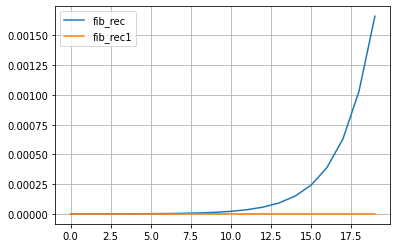

In [ ]:
compare([fib_rec, fib_rec1], range(20))

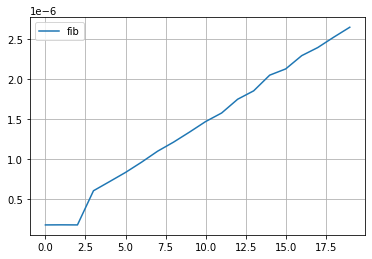

In [ ]:
compare([fib], range(20))

## Piano


In [ ]:
def last_num_fib(n):
  if n<=2:
    return 1
  else:
    fib_array = [0, 1, 1]
    for i in range(3, n+1):
      fib_array.append((fib_array[i-1] + fib_array[i-2])%10)
  return fib_array[-1]  
  

In [ ]:
last_num_fib(100)

5

In [ ]:
def fib_mod(n, m):
    
    def get_piano(m):
      piano_array = [0, 1, 1]
      for i in range(3, 6*m + 2):
        piano_array.append((piano_array[i-1] + piano_array[i-2])%m)
        if piano_array[i]==1 and piano_array[i-1]==0:
          return piano_array[:-2], i-1
        
    piano, piano_len = get_piano(m)
    remainder = n%piano_len
    return piano[remainder]

In [ ]:
n = 8
m = 2
print('fib({0}) = {1}'.format(n, fib(n)))
print("{}%{} = {}".format(fib(n), m, fib(n)%m))
print(fib_mod(n, m))

fib(8) = 21
21%2 = 1
1


In [ ]:
fib_mod(11, 2)

0

# GCD

First of all lets write test for our gcd

In [ ]:
import random

def test(gcd, n_iter=100):
  for i in range(n_iter):
    a = random.randint(0, 1024)
    b = a*random.randint(0, 1024)
    c = a*random.randint(0, 1024)
    assert gcd(a, a) == gcd(a, 0) == a
    assert gcd(b, b) == gcd(b, 0) == b
    assert gcd(c, c) == gcd(c, 0) == c
    assert gcd(a, 1) == gcd(b, 1) == gcd(c, 1) == 1
    d = gcd(b, c)
    assert b % d == c % d == 0

In [ ]:
def naive_gcd(a, b):
  assert a >= 0 and b >= 0
  for d in reversed(range(1, max(a, b) + 1)):
    if d == 0 or a % d == b % d == 0:
      return d

In [ ]:
print(naive_gcd(10, 7))
print(naive_gcd(104, 724))
test(naive_gcd)

1
4


In [ ]:
def gcd(a, b):
  return gcd(b, a%b) if b else a

In [ ]:
gcd(63967072, 14159572)

4